# 手書き文字の認識を行う

- **モデルの構築**

  ディープラーニングによる画像データの分類を行います。
  
  CNN（Convolutional Neural Network、畳み込みニューラルネットワーク）を使ってモデルを構築します。

- **学習に使うデータセット**

  Kerasから手書き文字のデータセットをダウンロードします。
  
  Kerasのデータセットは予めTraining setとTest setに分けられています。

## 1. 必要なライブラリのインポート

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Keras
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

# データの分割
from sklearn.model_selection import train_test_split

# 手書き数字のデータセット
from tensorflow.keras.datasets import mnist

# JupyterNotebook上でグラフを表示する設定
%matplotlib inline
# DataFrameで全ての列を表示する設定
pd.options.display.max_columns = None

## 2. データの読込

In [2]:
# Kerasに添付されている手書き数字のデータセットをダウンロード
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

## 3.データの確認

In [3]:
# 形状の確認
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
# X_trainの先頭1行を表示
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
# Y_trainの先頭1行を表示
Y_train[0]

5

### 手書き数字の可視化

In [6]:
# 「数字:空のリスト」の辞書を作成する
images = {label: [] for label in range(0,10)}

In [7]:
# 総イメージ数
image_count = 0

# それぞれの数字のリストに、説明変数をappendしていく
for i in range(0, len(X_train)):
    if len(images[Y_train[i]]) < 10:
        images[Y_train[i]].append(X_train[i])
        image_count += 1
        if image_count == 100:
            break

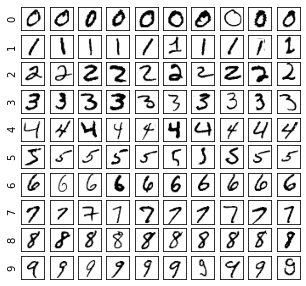

In [8]:
# 少し時間がかかります。
# 10行10列にグラフを分割
fig, ax = plt.subplots(10, 10, figsize=(5, 5))

for i in range(10):
    # ラベル
    ax[i, 0].set_ylabel(i)

    for j in range(10):
        # 行=i、列=jの位置に画像を描画する
        ax[i, j].imshow(images[i][j].reshape(28, 28), cmap='Greys')

        # 目盛を表示しない設定
        ax[i, j].tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)

plt.show()

## 4. データの前処理

In [9]:
# 形状の確認
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [10]:
# len関数を使い、X_trainを(X_trainの長さ, 28, 28, 1)にreshapeしてX_train2に代入
X_train2 = X_train.reshape(len(X_train), 28, 28, 1)

# len関数を使い、X_testを(X_testの長さ, 28, 28, 1)にreshapeしてX_test2に代入
X_test2 = X_test.reshape(len(X_test), 28, 28, 1)


In [11]:
# to_categoricalを使い、Y_trainをカテゴリー変数に展開してY_train2に代入
Y_train2 = to_categorical(Y_train)

# to_categoricalを使い、Y_testをカテゴリー変数に展開してY_test2に代入
Y_test2 = to_categorical(Y_test)


In [12]:
# 形状の確認
print(X_train2.shape)
print(Y_train2.shape)
print(X_test2.shape)
print(Y_test2.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [13]:
# train_test_splitを使いデータを7:3に分割
# 機械学習用データ(X_train2、Y_train2)を「X_train2, X_valid2, Y_train2, Y_valid2」に分割
X_train2, X_valid2, Y_train2, Y_valid2 = train_test_split(X_train2, Y_train2, test_size=0.3, random_state=0)

In [14]:
# データ(学習、検証、テスト)の形状を確認
print("X_train2=", X_train2.shape, ", Y_train2=", Y_train2.shape)
print("X_valid2=", X_valid2.shape, ", Y_valid2=", Y_valid2.shape)
print("X_test2=", X_test2.shape, ", Y_test2=", Y_test2.shape)

X_train2= (42000, 28, 28, 1) , Y_train2= (42000, 10)
X_valid2= (18000, 28, 28, 1) , Y_valid2= (18000, 10)
X_test2= (10000, 28, 28, 1) , Y_test2= (10000, 10)


## 5. モデルの構築

In [17]:
# モデルの初期化
model = keras.Sequential()

# ここにモデルを構築するコードを記述してください
# 入力層
model.add(Conv2D(64, kernel_size=3, padding="same",
                 input_shape=(28, 28, 1,), activation="relu"))
# プーリング層
model.add(MaxPooling2D(pool_size=(2, 2)))
# ドロップアウト層
model.add(Dropout(0.25))

# 層のユニットの繰り返し
model.add(Conv2D(128, kernel_size=3, padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 1次元に変換
model.add(Flatten())
model.add(Dense(64, activation="relu", kernel_regularizer=regularizers.l2(0.001))) # 正規化
model.add(Dropout(0.5))

# 出力層
model.add(Dense(10, activation='softmax'))

# モデルの構築
model.compile(optimizer = "rmsprop", loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
# モデルの構造を表示
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 7, 7, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)             

In [20]:
%%time
# 学習を実施し、結果をlogで受け取る。EarlyStoppingを使用する
log = model.fit(X_train2, Y_train2, epochs=10, batch_size=32, verbose=True,
                callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss',
                                                         min_delta=0, patience=100,
                                                         verbose=1)],
         validation_data=(X_valid2, Y_valid2))

Epoch 1/10
1313/1313 [==============================] - 158s 120ms/step - loss: 0.6397 - accuracy: 0.8111 - val_loss: 0.1594 - val_accuracy: 0.9653
Epoch 2/10
1313/1313 [==============================] - 157s 120ms/step - loss: 0.2506 - accuracy: 0.9394 - val_loss: 0.1134 - val_accuracy: 0.9742
Epoch 3/10
1313/1313 [==============================] - 154s 117ms/step - loss: 0.2452 - accuracy: 0.9433 - val_loss: 0.1196 - val_accuracy: 0.9765
Epoch 4/10
1313/1313 [==============================] - 153s 117ms/step - loss: 0.2425 - accuracy: 0.9429 - val_loss: 0.1057 - val_accuracy: 0.9779
Epoch 5/10
1313/1313 [==============================] - 154s 118ms/step - loss: 0.2497 - accuracy: 0.9432 - val_loss: 0.1052 - val_accuracy: 0.9783
Epoch 6/10
1313/1313 [==============================] - 154s 117ms/step - loss: 0.2495 - accuracy: 0.9433 - val_loss: 0.1332 - val_accuracy: 0.9713
Epoch 7/10
1313/1313 [==============================] - 154s 117ms/step - loss: 0.2484 - accuracy: 0.9443 - val_

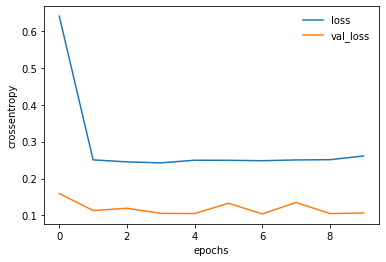

In [21]:
# 学習の課程をグラフで表示する
plt.plot(log.history['loss'], label='loss')
plt.plot(log.history['val_loss'], label='val_loss')
plt.legend(frameon=False) # 凡例の表示
plt.xlabel("epochs")
plt.ylabel("crossentropy")
plt.show()


## 6. テストデータによる評価

In [22]:
# 環境により、そのままX_test2を使うとエラーになる対策(float型に変換)
X_test2 = X_test2 * 1.0

In [23]:
# predictを使い、X_test2をもとに予測した結果をY_pred2に代入
Y_pred2 = np.argmax(model.predict(X_test2), axis=1)


In [24]:
# カテゴリー変数Y_test2を復元してY_test2_に代入
Y_test2_ = np.argmax(Y_test2, axis=1)


In [25]:
# classification_reportを使い、モデルの評価を実施
from sklearn.metrics import classification_report

print(classification_report(Y_test2_, Y_pred2))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.97      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.98      0.97      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



#### accuracy（正解率）は 0.98 、つまり98%であり、かなり性能の良いモデルを得ることができました。